<a href="https://colab.research.google.com/github/vikaschaudhary53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [506]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [507]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [508]:
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Users.csv')

In [509]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [510]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [511]:
books_df.shape

(271360, 8)

####Get the required columns in 'book_df'

In [512]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [513]:
#select the columns that we need
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [514]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [515]:
#Rename columns
books_df.rename(columns={'Book-Title':'title', 'Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'}, inplace=True)

In [516]:
books_df.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [517]:
books_df.isna().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [518]:
#drop the null values from dataframe
books_df.dropna(inplace = True)

In [519]:
books_df.isna().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

In [520]:
books_df.isnull().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

###Know about the users

In [521]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [522]:
users_df.shape

(278858, 3)

In [523]:
#renaming all the columns to small case
users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'}, inplace=True)

In [524]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [525]:
users_df

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


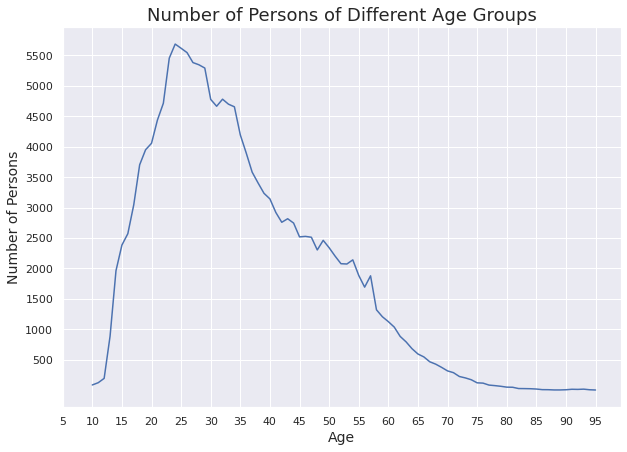

In [526]:
#graph to show the number of ratings done by the different age group
plt.subplots(figsize =(10, 7))
users_df[(~users_df['age'].isnull()) & (users_df['age']>=10) & (users_df['age']<=95)]['age'].value_counts().sort_index().plot()
plt.xlabel('Age', size=14)
plt.ylabel('Number of Persons', size=14)
plt.title('Number of Persons of Different Age Groups', size=18)
plt.xticks(np.arange(5,100,5))
plt.yticks(np.arange(500,6000,500))
plt.show()

In the 'age' column the values are going beyond the permissible limits. Users with the age beyond 15 years and below 90 will be kept.

In [527]:
location_list = list(users_df['location'].value_counts().keys())
location_list

['london, england, united kingdom',
 'toronto, ontario, canada',
 'sydney, new south wales, australia',
 'melbourne, victoria, australia',
 'portland, oregon, usa',
 'chicago, illinois, usa',
 'seattle, washington, usa',
 'new york, new york, usa',
 'madrid, madrid, spain',
 'vancouver, british columbia, canada',
 'san diego, california, usa',
 'san francisco, california, usa',
 'ottawa, ontario, canada',
 'houston, texas, usa',
 'berlin, berlin, germany',
 'milano, lombardia, italy',
 'los angeles, california, usa',
 'austin, texas, usa',
 'calgary, alberta, canada',
 'barcelona, barcelona, spain',
 'hamburg, hamburg, germany',
 'roma, lazio, italy',
 'barcelona, catalunya, spain',
 'victoria, british columbia, canada',
 'brisbane, queensland, australia',
 'edmonton, alberta, canada',
 'st. louis, missouri, usa',
 'perth, western australia, australia',
 'tucson, arizona, usa',
 'philadelphia, pennsylvania, usa',
 'adelaide, south australia, australia',
 'montreal, quebec, canada',
 'a

In [528]:
long_list = []
count = 0
for i in location_list:
  if len(i.split(",")) >3:
    count+=1
    long_list.append(i)
#print(count)


In [529]:
long_list

['washington, dc, dc, usa',
 'amora, estremadura,, portugal',
 'washington, d.c., dc, usa',
 'vancouver, bc, british columbia, canada',
 'albuquerque,, new mexico, usa',
 'portland,, oregon, usa',
 'phoenix,, arizona, usa',
 'victoria, b.c., british columbia, canada',
 'v. n. santo andré, setúbal, alentejo, portugal',
 'christchurch, canterbury, south island, new zealand',
 'madrid, españa, madrid, spain',
 'prince george, bc, british columbia, canada',
 'richmond, va, virginia, usa',
 'woking, surrey, england, united kingdom',
 'brooklyn, ny, new york, usa',
 'austin, texas, texas, usa',
 'apple valley, mn, minnesota, usa',
 'beijing, beijing, china, china',
 'melbourne,, victoria, australia',
 'shanghai, shanghai,china, china',
 'toronto,, ontario, canada',
 'chicago, il, illinois, usa',
 'weybridge, surrey, england, united kingdom',
 'zürich, zürich, stadt, switzerland',
 'des moines, ia, iowa, usa',
 'st. peters,, missouri, usa',
 'ipswich, suffolk, england, united kingdom',
 'akro

Let's find out the country of users and plot a graph for the number of users per country

In [530]:
country_list = [i.split(', ')[-1] for i in location_list]

In [531]:
country_count = pd.DataFrame(([[x,country_list.count(x)] for x in set(country_list)]), columns=['country', 'no_of_ratings'])

In [532]:
#top 10 countries 
country_count.sort_values(by=['no_of_ratings'], ascending=False)[:10]

,country,no_of_ratings
59,usa,18587
929,united kingdom,4064
372,germany,3979
400,spain,3060
631,italy,2642
590,canada,2492
1023,australia,2472
31,",",1508
477,france,1441
337,netherlands,1006


In [533]:
#removing the ',' entry in 'country' column and printing top 10 countries with the highest ratings
country_count = country_count[country_count['country']!=","]

In [534]:
country_count.sort_values(by=['no_of_ratings'], ascending=False, inplace=True)

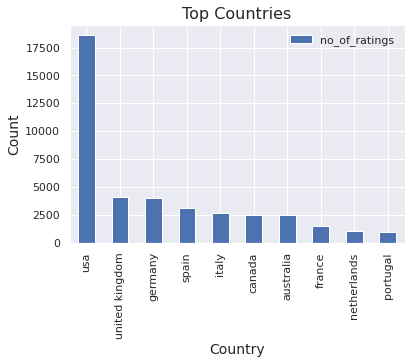

In [535]:
#bar graph for top 10 countries with highest ratings

country_count[:10].plot(x="country", y="no_of_ratings", kind="bar")
plt.title('Top Countries', size=16)
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.show()

###Know about ratings dataframe

In [536]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [537]:
ratings_df.shape

(1149780, 3)

In [538]:
#Rename the columns
ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'}, inplace=True)

In [539]:
ratings_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


####Filtering on the basis of:
1. Book at least has the ratings by 50 readers.
2. Reader at least has rated 200 books.

In [540]:
ratings_df['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [541]:
ratings_df[ratings_df['user_id']==11676]

,user_id,ISBN,rating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7
...,...,...,...
58923,11676,O77O428452,0
58924,11676,O805063196,0
58925,11676,O9088446X,8
58926,11676,X000000000,10


In [542]:
#top 10 users who rated the books
ratings_df['user_id'].value_counts()[:10]

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: user_id, dtype: int64

In [543]:
#top 10 highest rated books
ratings_df['ISBN'].value_counts()[:10]

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: ISBN, dtype: int64

In [544]:
ratings_df['user_id'].value_counts().shape

(105283,)

In [545]:
#keeping users with at least rating more than 200
ratings_df['user_id'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [546]:
x=ratings_df['user_id'].value_counts()>200

In [547]:
x[x].shape

(899,)

In [548]:
y=x[x].index

In [549]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [550]:
ratings_df=ratings_df[ratings_df['user_id'].isin(y)]

In [551]:
ratings_df

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


###Joining 'ratings_df' with 'books_df'

In [552]:
books_rating = ratings_df.merge(books_df, on='ISBN')

In [553]:
books_rating

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [554]:
number_rating=books_rating.groupby('title')['rating'].count().reset_index()

In [555]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [556]:
number_rating.rename(columns={'rating':'number_of_ratings'}, inplace=True)

In [557]:
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [558]:
#joining the rating with title
final_rating = books_rating.merge(number_rating, on='title')

In [559]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [560]:
final_rating = final_rating[final_rating['number_of_ratings']>50]

In [561]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [562]:
final_rating.isna().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [563]:
final_rating.isnull().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [564]:
final_rating.describe()

,user_id,rating,number_of_ratings
count,59903.000000,59903.000000,59903.000000
mean,140727.330985,2.012620,102.562326
std,80777.459046,3.570031,51.926142
min,254.000000,0.000000,51.000000
25%,70052.000000,0.000000,65.000000
50%,140358.000000,0.000000,84.000000
75%,212923.000000,3.000000,123.000000
max,278418.000000,10.000000,363.000000


In [565]:
booksWithNoYear = list(final_rating[final_rating['year'] == 0]['title'].value_counts().keys())

In [566]:
len(booksWithNoYear)

29

In [567]:
final_rating['year'].value_counts(ascending = False)[:50]

2002    7125
1999    5984
2001    5221
2000    4497
1998    4326
2003    4255
1996    3969
1997    3671
1994    3042
1995    2849
1993    2375
1992    2190
2004    1400
1990    1385
1989    1237
1991    1100
1986    1037
1987     917
1988     756
1984     477
1983     389
1985     314
1982     265
0        193
1976     151
1978     143
1959     116
1981      76
1979      68
1974      68
1980      43
1968      28
1975      22
2001      20
1999      18
2000      17
1993      12
2002      11
1995       9
2003       8
1998       8
1977       7
1992       7
1996       7
1994       6
1961       6
1960       6
1962       6
1997       5
0          5
Name: year, dtype: int64

0 is appearing twice, so it must be due to the datatype

In [568]:
#validatae if there are any unusual values in 'year' column
final_rating['year'] = final_rating['year'].astype(int)
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [569]:
final_rating['year'].value_counts(ascending = False)[:50]

2002    7136
1999    6002
2001    5241
2000    4514
1998    4334
2003    4263
1996    3976
1997    3676
1994    3048
1995    2858
1993    2387
1992    2197
2004    1401
1990    1387
1989    1240
1991    1105
1986    1038
1987     918
1988     759
1984     478
1983     391
1985     315
1982     267
0        198
1976     151
1978     143
1959     117
1981      77
1979      69
1974      68
1980      48
1968      28
1975      23
1977      10
1962       6
1960       6
1961       6
1943       4
1971       4
1956       4
1948       3
1920       2
1951       2
1973       1
1969       1
2010       1
Name: year, dtype: int64

In [570]:
#dropping row where year is 0
final_rating = final_rating[final_rating['year'] != 0]
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [571]:
#check if 0 is still present in the dataframe
final_rating[final_rating['year']>1]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [572]:
final_rating['year'].value_counts().sort_index()

1920       2
1943       4
1948       3
1951       2
1956       4
1959     117
1960       6
1961       6
1962       6
1968      28
1969       1
1971       4
1973       1
1974      68
1975      23
1976     151
1977      10
1978     143
1979      69
1980      48
1981      77
1982     267
1983     391
1984     478
1985     315
1986    1038
1987     918
1988     759
1989    1240
1990    1387
1991    1105
1992    2197
1993    2387
1994    3048
1995    2858
1996    3976
1997    3676
1998    4334
1999    6002
2000    4514
2001    5241
2002    7136
2003    4263
2004    1401
2010       1
Name: year, dtype: int64

In [573]:
#basic overview
print("Number of Books in final dataset:", len(final_rating.groupby(['title']).count()))
print("Number of Author in final dataset:", len(final_rating.groupby(['author']).count()))
print("Number of Publishers in final dataset:", len(final_rating.groupby(['publisher']).count()))


Number of Books in final dataset: 703
Number of Author in final dataset: 563
Number of Publishers in final dataset: 350


In [574]:
#number of authors mentions
final_rating['author'].value_counts()

Stephen King          2509
Nora Roberts          2200
John Grisham          1820
James Patterson       1751
Mary Higgins Clark    1309
                      ... 
Jim Debrosse             1
Terry Coleman            1
Patrick O'Leary          1
Jefferson Carter         1
Madeena S. Nolan         1
Name: author, Length: 563, dtype: int64

In [575]:
#converting all the authors name into the lowercase
final_rating['author'] = final_rating['author'].str.lower()
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [576]:
final_rating[final_rating['title'] == "When the Wind Blows"]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
15869,277478,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15870,2276,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15871,11676,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15872,16795,0446607657,9,When the Wind Blows,james patterson,1999,Warner Vision,175
15873,23768,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
...,...,...,...,...,...,...,...,...
16039,56399,0140094199,10,When the Wind Blows,raymond briggs,1982,Penguin USA,175
16040,122881,0140094199,0,When the Wind Blows,raymond briggs,1982,Penguin USA,175
16041,88283,0446676438,0,When the Wind Blows,james patterson,2000,Warner Books,175
16042,125519,0446676438,9,When the Wind Blows,james patterson,2000,Warner Books,175


In [577]:
final_rating[final_rating['title']=="When the Wind Blows"]['author'].value_counts()

james patterson     134
john saul            15
zachary alan fox      7
judith marshall       3
raymond briggs        2
Name: author, dtype: int64

* The books with same title has different authors.
* But the ISBN number is different.

In [578]:
final_rating['ISBN'].value_counts()

0971880107    363
0316666343    270
0060928336    220
0440214041    218
0385504209    215
             ... 
0743467256      1
0345371291      1
8401422345      1
3257208626      1
0613224450      1
Name: ISBN, Length: 2106, dtype: int64

In [579]:
final_rating[final_rating['ISBN']=='0316666343']['author'].value_counts()

alice sebold    270
Name: author, dtype: int64

Validate if unique ISBN have unique author name.

In [580]:
final_rating.groupby('ISBN')['author'].count().sort_values()

ISBN
0001047973      1
0553474286      1
055347703X      1
055347765X      1
0553477706      1
             ... 
0385504209    215
0440214041    218
0060928336    220
0316666343    270
0971880107    363
Name: author, Length: 2106, dtype: int64

Explore about the authors and books

In [581]:
final_rating[final_rating['ISBN']=='0971880107']['author'].value_counts()

rich shapero    363
Name: author, dtype: int64

In [582]:
isbn_author = final_rating[['ISBN', 'author']]
isbn_author

,ISBN,author
0,002542730X,james finn garner
1,002542730X,james finn garner
2,002542730X,james finn garner
3,002542730X,james finn garner
4,002542730X,james finn garner
...,...,...
228880,0061090956,kerry tucker
228881,0061090956,kerry tucker
228882,074350996X,jennifer lauck
228883,074350996X,jennifer lauck


In [583]:
print("Unique ISBN:", len(isbn_author['ISBN'].value_counts()))
print("Unique authors:",len(isbn_author['author'].value_counts()))

Unique ISBN: 2106
Unique authors: 495


In [584]:
isbn = final_rating.groupby('ISBN')

In [585]:
book_count_list = list(isbn.first()['title'].value_counts().values)

In [586]:
len(book_count_list)

703

In [587]:
book_list = list(isbn.first()['title'].value_counts().keys())

In [588]:
book_names = []
j = 0
for i in book_count_list:
  if i>1:
    book_names.append(book_list[j])
    j += 1

In [589]:
len(book_names)

526

In [590]:
book_names[:10]

['Wuthering Heights',
 'The Secret Garden',
 'Pride and Prejudice',
 'The Wedding',
 'The Gift',
 'Homecoming',
 'The Promise',
 'Fahrenheit 451',
 'Carrie',
 'Matilda']

Get a list of books where the authors entries are different or more than one.

In [591]:
#creating a list of books with 2 authors entries
two_authors_book = []
many_authors_books = []
count = 0
for i in book_names:
  if len(final_rating[final_rating['title']== i]['author'].value_counts().values)==2:
    two_authors_book.append(book_names[count])
  
  elif len(final_rating[final_rating['title']== i]['author'].value_counts().values) >2:
    many_authors_books.append(book_names[count])
  count +=1


In [592]:
print("There are", len(two_authors_book),"books where the number of entries in 'author' column are 2")
print("There are", len(many_authors_books),"books where the number of entries in 'author' column are more than 2")

There are 72 books where the number of entries in 'author' column are 2
There are 61 books where the number of entries in 'author' column are more than 2


In [593]:
author1 = []
author2 = []
for i in two_authors_book:
  author1.append(final_rating[final_rating['title']==i]['author'].value_counts().keys()[0])
  author2.append(final_rating[final_rating['title']==i]['author'].value_counts().keys()[1])


In [594]:
author1[:5]

['ray bradbury',
 'j.r.r. tolkien',
 'j.r.r. tolkien',
 'j.r.r. tolkien',
 'daphne du maurier']

In [595]:
author2[:5]

['bradbury',
 'j. r. r. tolkien',
 'j. r. r. tolkien',
 'j. r. r. tolkien',
 'daphnã?â© du maurier']

In [596]:
#creating a dataframe for two authors entry books.
data = {'books': two_authors_book, 
        'author1': author1,
        'author2': author2}

two_author_book_df = pd.DataFrame(data)

In [597]:
two_author_book_df.head(10)

,books,author1,author2
0,Fahrenheit 451,ray bradbury,bradbury
1,"The Return of the King (The Lord of the Rings,...",j.r.r. tolkien,j. r. r. tolkien
2,The Fellowship of the Ring (The Lord of the Ri...,j.r.r. tolkien,j. r. r. tolkien
3,"The Two Towers (The Lord of the Rings, Part 2)",j.r.r. tolkien,j. r. r. tolkien
4,Rebecca,daphne du maurier,daphnã?â© du maurier
5,Falling Angels,tracy chevalier,barbara gowdy
6,Strangers,dean r. koontz,taichi yamada
7,Sole Survivor,dean koontz,ruthanne lum mccunn
8,The Little Prince,antoine de saint-exupã©ry,antoine de saint-exupery
9,Now You See Her,linda howard,whitney otto


In [598]:
two_author_book_df['author1'][0].split(" ")

['ray', 'bradbury']

In [599]:
def author(name1, name2):
  for i in name1.split(" "):
    if i in name2.split(" "):
      return name1


In [600]:
li = two_author_book_df.apply(lambda x: author(x['author1'], x['author2']), axis=1)
li

0                  ray bradbury
1                j.r.r. tolkien
2                j.r.r. tolkien
3                j.r.r. tolkien
4             daphne du maurier
                ...            
67             gwyn hyman rubio
68                         None
69                robert pirsig
70               dean r. koontz
71    patricia daniels cornwell
Length: 72, dtype: object

In [601]:
li.dropna()

0                  ray bradbury
1                j.r.r. tolkien
2                j.r.r. tolkien
3                j.r.r. tolkien
4             daphne du maurier
8     antoine de saint-exupã©ry
15                   tom clancy
22                   sue miller
24               dean r. koontz
28       william gerald golding
32            madeleine l'engle
33            patricia cornwell
34            patricia cornwell
35                richard adams
36                 john berendt
38             robert c. atkins
41                  dean koontz
44         lucy maud montgomery
48                john sandford
49                john sandford
50    patricia daniels cornwell
54              jennifer crusie
56                  john irving
65              l.m. montgomery
67             gwyn hyman rubio
69                robert pirsig
70               dean r. koontz
71    patricia daniels cornwell
dtype: object

In [602]:
#creating a list of books with same authors but entered in different ways
same_author_books = []
for ind in range(len(two_author_book_df)):
  for i in range(len(two_author_book_df['author1'][ind].split())):
    a = two_author_book_df['author1'][ind].split()[i]
    for j in two_author_book_df['author2'][ind].split():
      if a in j:
        same_author_books.append(two_author_book_df['books'][ind])
     

In [603]:
two_author_book_df = two_author_book_df.loc[two_author_book_df['books'].isin(set(same_author_books))]
two_author_book_df

,books,author1,author2
0,Fahrenheit 451,ray bradbury,bradbury
1,"The Return of the King (The Lord of the Rings,...",j.r.r. tolkien,j. r. r. tolkien
2,The Fellowship of the Ring (The Lord of the Ri...,j.r.r. tolkien,j. r. r. tolkien
3,"The Two Towers (The Lord of the Rings, Part 2)",j.r.r. tolkien,j. r. r. tolkien
4,Rebecca,daphne du maurier,daphnã?â© du maurier
8,The Little Prince,antoine de saint-exupã©ry,antoine de saint-exupery
15,Rainbow Six,tom clancy,clancy tom
22,While I Was Gone,sue miller,miller sue
24,False Memory,dean r. koontz,dean koontz
28,Lord of the Flies,william gerald golding,william golding


In [604]:
#creating dictionary from the above dataframe to replace the anomaly in the authors name in the given books
two_author_book_dict = dict(zip(two_author_book_df.books, two_author_book_df.author1))
two_author_book_dict

{'Fahrenheit 451': 'ray bradbury',
 'The Return of the King (The Lord of the Rings, Part 3)': 'j.r.r. tolkien',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)': 'j.r.r. tolkien',
 'The Two Towers (The Lord of the Rings, Part 2)': 'j.r.r. tolkien',
 'Rebecca': 'daphne du maurier',
 'The Little Prince': 'antoine de saint-exupã©ry',
 'Rainbow Six': 'tom clancy',
 'While I Was Gone': 'sue miller',
 'False Memory': 'dean r. koontz',
 'Lord of the Flies': 'william gerald golding',
 'A Wrinkle in Time': "madeleine l'engle",
 'Isle of Dogs': 'patricia cornwell',
 'The Last Precinct': 'patricia cornwell',
 'Watership Down': 'richard adams',
 'Midnight in the Garden of Good and Evil': 'john berendt',
 "Dr. Atkins' New Diet Revolution": 'robert c. atkins',
 'From the Corner of His Eye': 'dean koontz',
 'Anne of the Island': 'lucy maud montgomery',
 'Mind Prey': 'john sandford',
 'Sudden Prey': 'john sandford',
 'Unnatural Exposure': 'patricia daniels cornwell',
 'Faking It': 'jennif

In [605]:
list(two_author_book_dict.keys())[0]

'Fahrenheit 451'

In [606]:
final_rating[final_rating['title']=='Fahrenheit 451']['author'].value_counts()

ray bradbury    118
bradbury          1
Name: author, dtype: int64

In [607]:
for i in two_author_book_dict.keys():
  final_rating['author'].mask(final_rating['title']==i, two_author_book_dict.get(i), inplace = True)
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [608]:
#validate if it worked
final_rating[final_rating['title']=='Fahrenheit 451']['author'].value_counts()

ray bradbury    119
Name: author, dtype: int64

Look into the list of the books with more than one author.

In [609]:
final_rating.loc[final_rating['title'].isin(set(many_authors_books))][['title', 'author']].drop_duplicates().head(10)

,title,author
679,The Secret Garden,frances hodgson burnett
713,The Secret Garden,m.j. carr
723,The Secret Garden,frances h. burnett
2979,Silent Witness,richard north patterson
3041,Silent Witness,margaret yorke
3042,Silent Witness,carol ellis
3683,Postmortem,patricia daniels cornwell
3752,Postmortem,patricia cornwell
3760,Postmortem,patricia d. cornwell
5164,Lightning,dean r. koontz


In [610]:
many_author_book_df = final_rating.loc[final_rating['title'].isin(set(many_authors_books))][['title', 'author']].drop_duplicates()
many_author_book_df

,title,author
679,The Secret Garden,frances hodgson burnett
713,The Secret Garden,m.j. carr
723,The Secret Garden,frances h. burnett
2979,Silent Witness,richard north patterson
3041,Silent Witness,margaret yorke
...,...,...
223482,Dark Angel,cassandra collins
223483,Dark Angel,donna ball
228802,Still Waters,tami hoag
228869,Still Waters,jennifer lauck


In [611]:
many_author_book_df.head(20)

,title,author
679,The Secret Garden,frances hodgson burnett
713,The Secret Garden,m.j. carr
723,The Secret Garden,frances h. burnett
2979,Silent Witness,richard north patterson
3041,Silent Witness,margaret yorke
3042,Silent Witness,carol ellis
3683,Postmortem,patricia daniels cornwell
3752,Postmortem,patricia cornwell
3760,Postmortem,patricia d. cornwell
5164,Lightning,dean r. koontz


By deleting the middle name the inaccuracy in the authors name can be reduced without convoluting the dataframe.

In [612]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [613]:
final_rating[final_rating['title']=='The Secret Garden']['author'].value_counts()

frances hodgson burnett    56
frances h. burnett         17
m.j. carr                   4
Name: author, dtype: int64

In [614]:
def columns(author):
  a = author.split()
  return str(a[0]+" "+a[-1])

In [615]:
final_rating['author'] = final_rating.apply(lambda x: columns(x['author']), axis = 1)

In [616]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [617]:
#validating if the above method works
final_rating[final_rating['title']=='The Secret Garden']['author'].value_counts()

frances burnett    73
m.j. carr           4
Name: author, dtype: int64

Earliers, there were: 'frances hodgson burnett' have 48 entries and frances burnett have 11, and now frances burnett have 59 entries.

The above dataframe shows that some books with same names have different authors while some have same authors with different entries

The database also has book title where the number of author are 10.

It appears that the book with different author names are different books, so we will keep those entries for books as they are.

###Plotting different graphs/charts for different pieces of information that are there in the dataset.

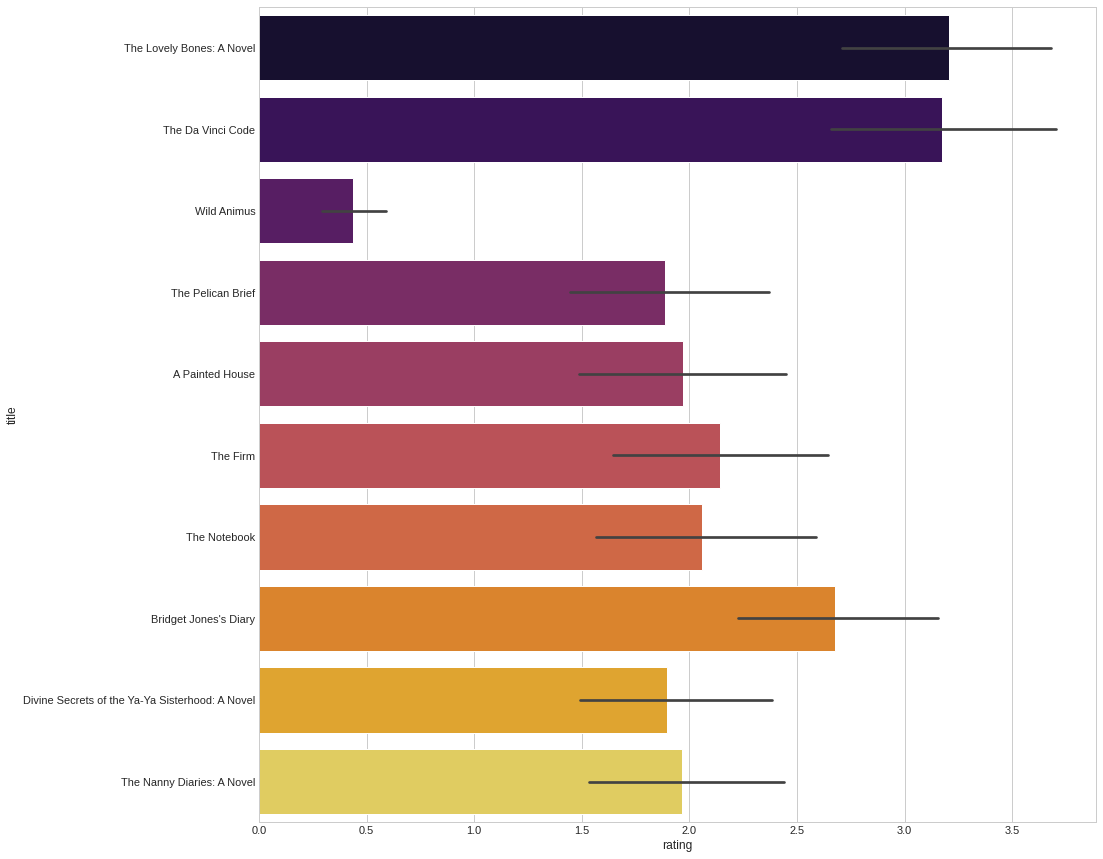

In [666]:
top_ten=final_rating[final_rating['number_of_ratings']>220]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,15])
sns.barplot(x='rating', y='title', data=top_ten,palette='inferno')
plt.show()

[]

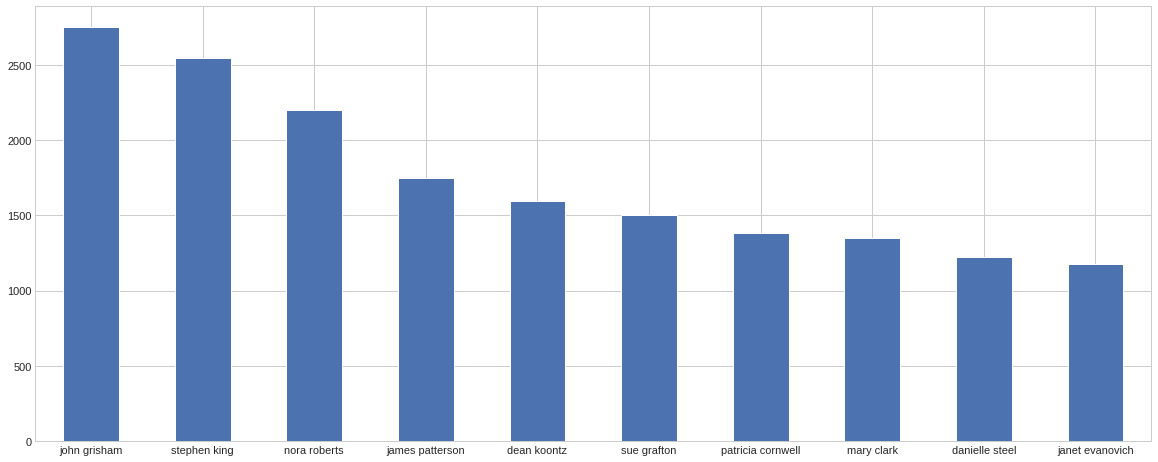

In [619]:
#top 10 authors with highest mentions
top10_mention = final_rating['author'].value_counts()[:10]
plt.figure(figsize=[20,8])
ax = top10_mention.plot.bar(x='lab', y='val', rot=0)
plt.plot()

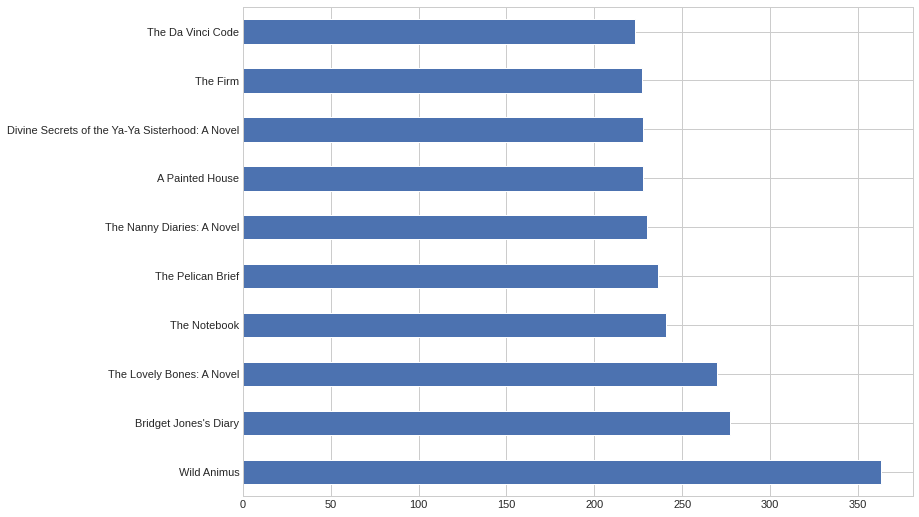

In [620]:
#top 10 books that received ratings with highest mentions
plt.figure(figsize=[12,9])
ax = final_rating['title'].value_counts()[:10].plot.barh()

In [621]:
top_rated=final_rating[final_rating['rating']==10]

[]

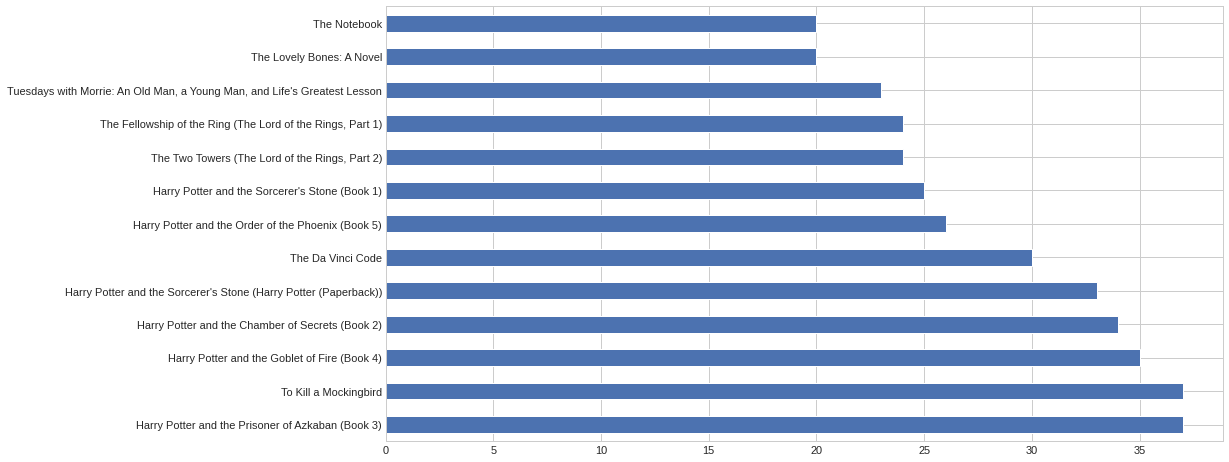

In [622]:
#top books that received 10-rating at least 20 times
plt.figure(figsize=[15,8])
ax = top_rated['title'].value_counts()[:13].plot.barh(x='lab', y='val', rot=0)
plt.plot()

* Author who wrote highest number of books.
* Highly liked author.
* Top publishers
* Year and publishers
* authors active years
* span of top-10 books

In [623]:
#list of 10 authors who wrote highest number of books
final_rating[['title', 'author']].drop_duplicates()['author'].value_counts()[:14]

nora roberts         34
stephen king         33
dean koontz          24
danielle steel       23
mary clark           19
sue grafton          17
john grisham         16
james patterson      16
patricia cornwell    14
janet evanovich      12
tom clancy           11
michael crichton     10
sandra brown          9
nicholas sparks       8
Name: author, dtype: int64

In [624]:
#average rating of the authors who wrote at least 10 books
final_rating.loc[final_rating['author'].isin(final_rating[['title', 'author']].drop_duplicates()['author'].value_counts()[:13].keys())].groupby(['author']).mean()['rating'].sort_values(ascending=True)

author
tom clancy           1.195946
danielle steel       1.275918
sandra brown         1.290514
mary clark           1.463415
michael crichton     1.633215
patricia cornwell    1.773188
dean koontz          1.807403
nora roberts         1.861364
james patterson      1.920046
john grisham         2.008727
sue grafton          2.071952
janet evanovich      2.643161
stephen king         2.750000
Name: rating, dtype: float64

In [625]:
#top 10 publishers in terms of the number of books
final_rating[['title', 'publisher']].drop_duplicates()['publisher'].value_counts()[:10]

Ballantine Books            76
Berkley Publishing Group    67
Pocket                      64
Warner Books                61
Dell                        48
Bantam Books                45
Signet Book                 44
Bantam                      44
Random House Audio          39
Putnam Pub Group            37
Name: publisher, dtype: int64

In [626]:
final_rating[['year', 'publisher']].drop_duplicates().sort_values(by='year').groupby(['year', 'publisher']).first()

Empty DataFrame
Columns: []
Index: [(1920, Gallimard Jeunesse), (1943, Harcourt), (1948, Doubleday Books), (1951, Little, Brown), (1956, Houghton Mifflin Company), (1956, Penguin Putnam~mass), (1956, Signet Book), (1959, Perigee Trade), (1959, Signet Book), (1960, Harpercollins), (1961, Signet Book), (1962, Farrar Straus Giroux), (1968, Harcourt), (1969, Alfred A. Knopf), (1971, Bantam Books), (1971, LGF), (1973, Scholastic Library Pub), (1974, HarperTrophy), (1974, Penguin Books), (1975, Harpercollins), (1975, Knopf : distributed by Random House), (1975, New American Library), (1975, Walker &amp; Company), (1976, Amereon Limited), (1976, Avon), (1976, Laure Leaf), (1977, Bantam Dell Pub Group), (1977, Fawcett Books), (1977, HarperCollins), (1977, Harpercollins), (1977, Not Avail), (1978, Avon), (1978, Bantam Books), (1978, Dell), (1978, Signet Book), (1979, Ardis Publishers), (1979, Avon Books), (1979, Bantam Books), (1979, Del Rey Books), (1979, Dell Publishing), (1979, Pocket), (1979, Viking Books), (1980, Ballantine Books), (1980, HarperCollins), (1980, New Amer Library), (1980, Putnam Pub Group), (1980, Random House Inc), (1980, Scholastic), (1980, Signet Book), (1981, Avon Books), (1981, Ballantine Books), (1981, Bantam), (1981, Bantam Books), (1981, Berkley Publishing Group), (1981, Books on Tape), (1981, Dell Publishing), (1981, Naiad Press), (1981, Pocket), (1981, Putnam Pub Group), (1981, Scholastic), (1981, Signet Book), (1981, Summit Books), (1981, Viking Books), (1982, Avon Books), (1982, Ballantine Books), (1982, Bantam Books), (1982, Bantam Classics), (1982, Donald m Grant), (1982, Dutton Books), (1982, Harcourt Inc), (1982, Harpercollins Juvenile Books), (1982, Harvest Books), (1982, Harvest House Publishers), (1982, New American Library), (1982, Penguin USA), (1982, Pocket), (1982, Random House Inc), (1982, Readers Digest Assn), (1982, Viking Books), (1983, Ballantine Books), (1983, Bantam), (1983, Bantam Books), (1983, Bantam Books (Mm)), (1983, Bantam Classics), (1983, Berkley Pub Group), (1983, Books on Tape, Inc.), (1983, Dell Publishing Company), (1983, Fawcett Books), (1983, Hodder &amp; Stoughton General Division), (1983, New Amer Library), (1983, Not Avail), (1983, Penguin Books), (1983, Penguin Putnam~mass), (1983, Plume Books), (1983, Putnam Pub Group), (1983, Signet Book), (1983, Viking Books), (1984, Ballantine Books), (1984, Bantam), (1984, Bantam Books), ...]

[1180 rows x 0 columns]

In [627]:
final_rating[final_rating['year']==2004]['publisher'].value_counts()

Too Far                                        363
Signet Book                                    306
Jove Books                                     266
Berkley Publishing Group                       256
Warner Books                                    54
Signet                                          46
Penguin USA (Paper)                             45
Broadway Books                                  19
Anchor                                          11
Fawcett Books                                    8
Dell                                             7
Ballantine Books                                 4
Pocket Books                                     3
Scholastic Paperbacks                            2
Pub Group West                                   2
Thomas Dunne Books                               2
Chronicle Books                                  1
Turtleback Books Distributed by Demco Media      1
Delta                                            1
HarperTrophy                   

In [628]:
final_rating.head(3)

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82


In [629]:
print("The average rating of all the books is:", round(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False).mean(), 2))

The average rating of all the books is: 1.98


In [630]:
#number of books above rating 3
meanRating_df = pd.DataFrame(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False))

In [631]:
print("There are", len(meanRating_df[meanRating_df['rating']>3]), "books with rating above 3.")

There are 71 books with rating above 3.


In [632]:
meanRating_df = round(meanRating_df['rating'].sort_index(),1)

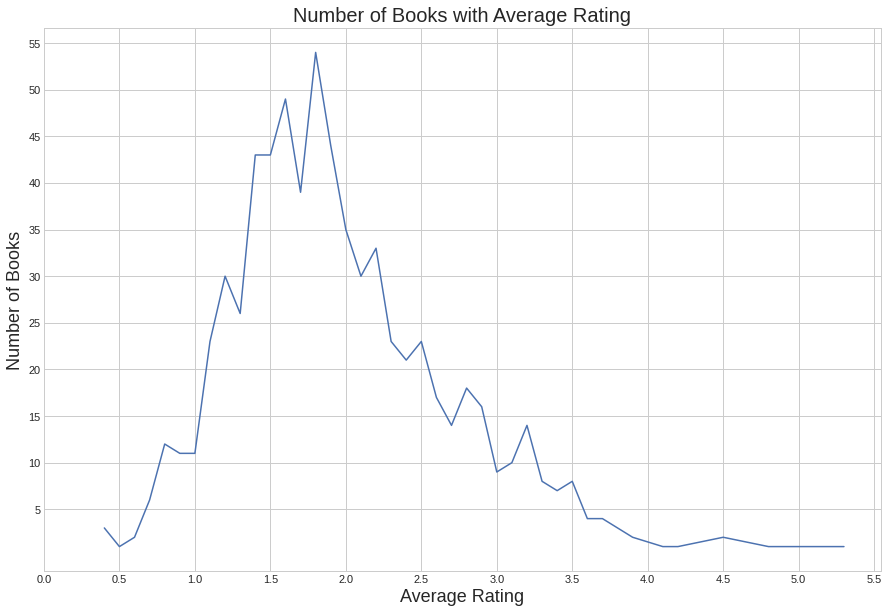

In [633]:
plt.figure(figsize=[15,10])
plt.plot(meanRating_df.value_counts().sort_index())
plt.title ('Number of Books with Average Rating', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.xticks(np.arange(0,6,0.5))
plt.yticks(np.arange(5,60,5))
plt.show()

In [634]:
len(top_rated['rating'].unique())
#top_rated=final_rating[final_rating['rating']==10]

1

In [635]:
len(top_rated['title'].unique())

653

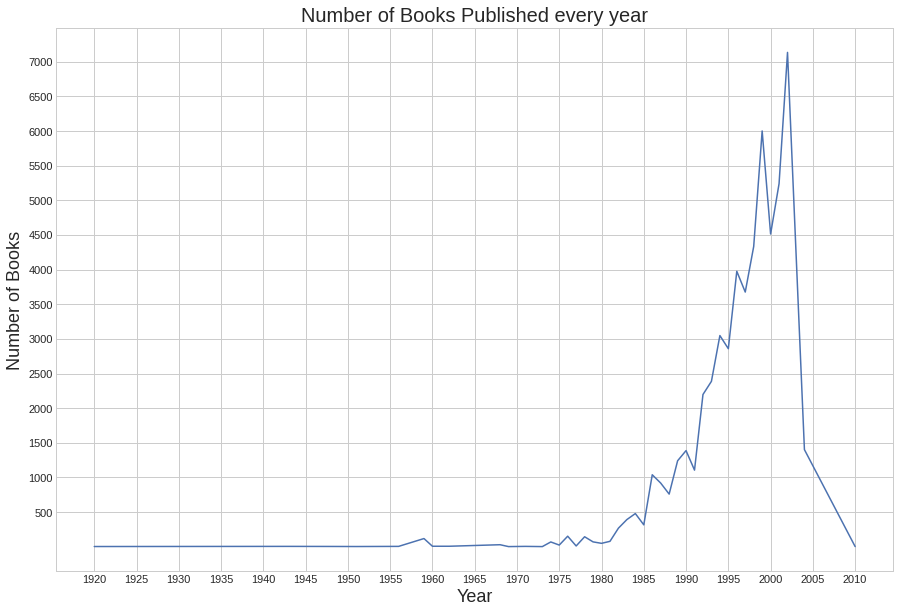

In [636]:
#year wise number of books published
plt.figure(figsize=[15,10])
plt.plot(final_rating['year'].value_counts().sort_index())
plt.title ('Number of Books Published every year', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.xticks(np.arange(1920,2015,5))
plt.yticks(np.arange(500,7500,500))
plt.show()

In [637]:
top_rated.groupby('title')['number_of_ratings'].count().reset_index()

,title,number_of_ratings
0,1984,11
1,1st to Die: A Novel,10
2,2nd Chance,7
3,84 Charing Cross Road,9
4,A Bend in the Road,3
...,...,...
648,Year of Wonders,5
649,You Belong To Me,2
650,Zen and the Art of Motorcycle Maintenance: An ...,2
651,Zoya,1


In [638]:
top_rated['number_of_ratings'].value_counts(ascending=True)

114      1
133      2
122      2
200      2
163      3
      ... 
78      76
81      96
183    104
53     106
62     107
Name: number_of_ratings, Length: 128, dtype: int64

In [639]:
top_rated[top_rated['number_of_ratings']>200]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
1100,16795,0142001740,10,The Secret Life of Bees,sue kidd,2003,Penguin Books,209
1108,29259,0142001740,10,The Secret Life of Bees,sue kidd,2003,Penguin Books,209
1114,36606,0142001740,10,The Secret Life of Bees,sue kidd,2003,Penguin Books,209
1124,55548,0142001740,10,The Secret Life of Bees,sue kidd,2003,Penguin Books,209
1163,124363,0142001740,10,The Secret Life of Bees,sue kidd,2003,Penguin Books,209
...,...,...,...,...,...,...,...,...
70145,273979,0312278586,10,The Nanny Diaries: A Novel,emma mclaughlin,2002,St. Martin's Press,230
70161,36606,0312291639,10,The Nanny Diaries: A Novel,emma mclaughlin,2003,St. Martin's Griffin,230
70179,107301,0312291639,10,The Nanny Diaries: A Novel,emma mclaughlin,2003,St. Martin's Griffin,230
70198,160819,0312291639,10,The Nanny Diaries: A Novel,emma mclaughlin,2003,St. Martin's Griffin,230


In [640]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [641]:
final_rating.shape

(57776, 8)

###Pivot Table

In [642]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [643]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [644]:
book_pivot.fillna(0, inplace=True)

In [645]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [646]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [647]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [648]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [649]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [650]:
np.where(book_pivot.index==237)

(array([], dtype=int64),)

In [651]:
distances, suggestions = model.kneighbors(book_pivot.iloc[356,:].values.reshape(1,-1), n_neighbors=6)

In [652]:
distances

array([[ 0.        , 13.67479433, 17.32050808, 17.34935157, 17.66352173,
        19.        ]])

In [653]:
len(distances[0])

6

In [654]:
suggestions

array([[356,  93, 305,   8, 173, 377]])

In [655]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['No Safe Place', 'Call of the Wild', 'Long After Midnight',
       'A Civil Action', 'Exclusive', 'Pleading Guilty'],
      dtype='object', name='title')


In [656]:
np.where(book_pivot.index=='1984')[0][0]

0

In [657]:
# def book_recommendation(book_name):
#   book_id = np.where(book_pivot.index==book_name)[0][0]
#   distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

#   for i in range(len(suggestions)):
#     # if i!=0:
#       # print(book_pivot.index[suggestions[i]])
#       print(i)

In [658]:
#book_recommendation('Animal Farm')

In [659]:
# def book_recommendation(book_name):
#   book_id = np.where(book_pivot.index==book_name)[0][0]
#   distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

#   for i in range(len(suggestions)):
#     if i==0:
#       #print("The suggestions for", book_name[1:], "are: ")
#       print("The suggestions for are: ")
#     if not i:
#       print(book_pivot.index[suggestions[i]])

In [660]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  # for i in range(len(suggestions)):
  #   # if i==0:
  #   #   #print("The suggestions for", book_name[1:], "are: ")
  #     # print("The suggestions for are: ")
  #     # print(suggestions)
  #   # if not i:
  #     print("The suggestions for the given book", book_pivot.index[suggestions[i]])
  print("The books similar to",book_pivot.index[suggestions[0][0]], "are:\n", list(book_pivot.index[suggestions[0][1:]]))

In [661]:
book_recommendation('Animal Farm')

The books similar to Animal Farm are:
 ['Exclusive', 'Call of the Wild', 'Jacob Have I Loved', 'Pleading Guilty', 'No Safe Place']


In [662]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

The books similar to Harry Potter and the Chamber of Secrets (Book 2) are:
 ['Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Goblet of Fire (Book 4)', "Harry Potter and the Sorcerer's Stone (Book 1)", 'Exclusive', 'The Cradle Will Fall']


In [663]:
book_recommendation('84 Charing Cross Road')

The books similar to 84 Charing Cross Road are:
 ['Exclusive', 'Call of the Wild', 'Jacob Have I Loved', 'No Safe Place', 'The Little Friend']


In [664]:
book_recommendation('Exclusive')

The books similar to Exclusive are:
 ['The Cradle Will Fall', 'The Long Road Home', 'Call of the Wild', 'Jacob Have I Loved', 'No Safe Place']
